In [1]:
# Import required libraries (Used in all tasks)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files


In [15]:
# Load the dataset
uploaded = files.upload()
df = pd.read_csv('Mall_Customers.csv')
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]


Saving Mall_Customers.csv to Mall_Customers.csv


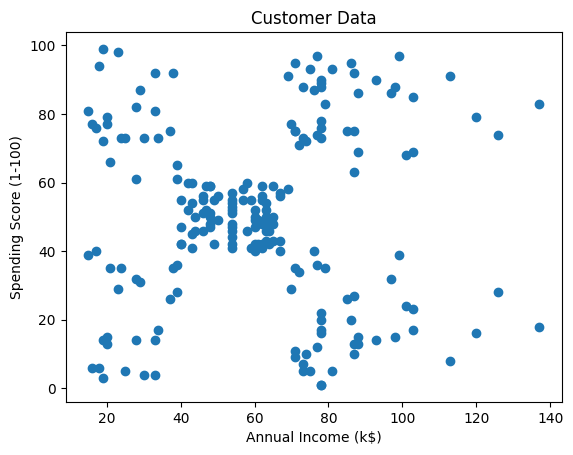

In [16]:
# Visualize the raw data
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data')
plt.show()


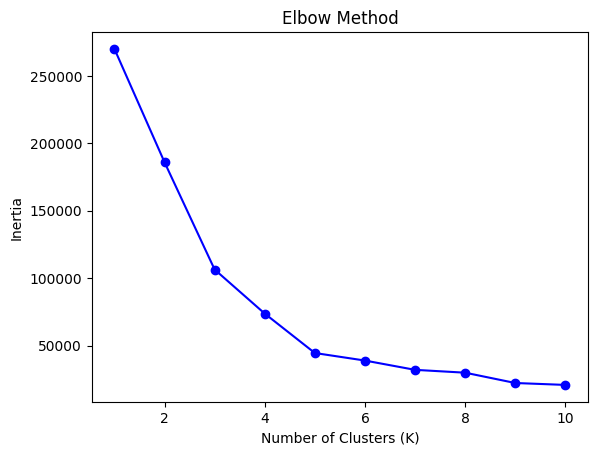

In [17]:
# Elbow Method to determine optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [18]:
# Apply KMeans and assign cluster labels
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(df)
df['Cluster'] = labels


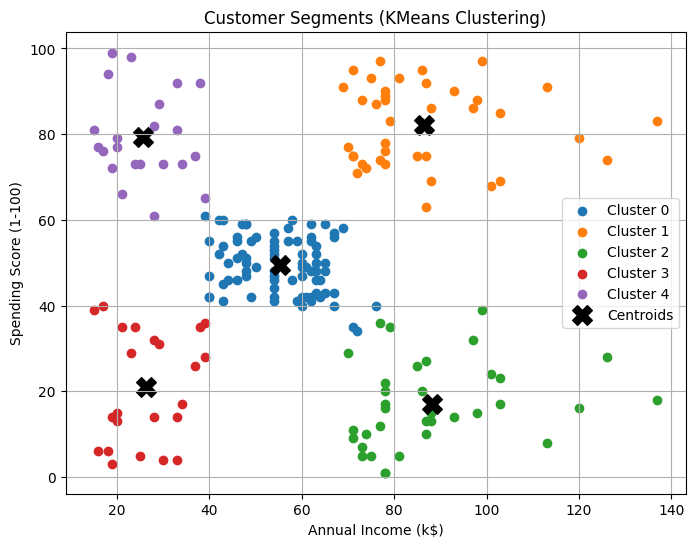

In [19]:
# Visualize clusters and centroids
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for cluster_id in range(5):
    plt.scatter(
        df[clusters == cluster_id]['Annual Income (k$)'],
        df[clusters == cluster_id]['Spending Score (1-100)'],
        label=f'Cluster {cluster_id}'
    )

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title("Customer Segments (KMeans Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Evaluate using Silhouette Score
score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], labels)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.554
